<a href="https://colab.research.google.com/github/thamyrys-bl/example-geobr/blob/main/Modelo_vetorial_de_dados_espaciais_Pontos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Criando pontos geograficos no Python

In [ ]:
print(p1)
print(p2)
print(p3)
print(p3d)

POINT (5.4 3)
POINT (10 -7)
POINT (80 25)
POINT Z (80 25 25)


In [ ]:
#Importe da biblioteca shapely os tipos de geometria necessárias
from shapely.geometry import Point, LineString, Polygon

In [ ]:
#Crie objetos do tipo geometria de Ponto a partir de coordenadas
p1= Point(5.4,3.0)
p2= Point(10,-7)
p3= Point(80,25)
p3d=Point(80,25,25)


In [ ]:
print(type(p1))
print(type(p3d))

<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>


# Atributos e funções da geometria de ponto

In [ ]:
#Armazene as coordenadas do ponto
p_coord=p1.coords
#coords: é uma propriedade de objetos de shaplin só que nesse caso em ponto. 
#Sua função é extrair a sequencia de coordenadas do objeto.

#Verifique o tipo da variavel p_coord
type(p_coord)

shapely.coords.CoordinateSequence

In [ ]:
# Extraia as coordenadas
xy=p_coord.xy

In [ ]:
#Extraia apenas a coordenada x do p1
x= p1.x

In [ ]:
#Extraia apenas a coordenada y do p1
y=p1.y

In [ ]:
print(xy)
print(x)
print(y)

(array('d', [5.4]), array('d', [3.0]))
5.4
3.0


In [ ]:
print(xy[0])
print(xy[1])

array('d', [5.4])
array('d', [3.0])


#Calculando distancia entre p1 e p2

In [ ]:
p_dist= p1.distance(p2)

#Aqui usei round(p_dist,2) para arrendodar a distancia até a segunda casa decimal.
# O %s funiona como uma reserva de espaço para o valor que virá depois de % e dentro de ()

print("A distÂncia entre os pontos é de %s graus decimais"%(p_dist))


A distÂncia entre os pontos é de 11.00727032465361 graus decimais


In [ ]:
print('A distÂncia entre os pontos é de %s graus decimais'%(round(p_dist,2)))

A distÂncia entre os pontos é de 11.01 graus decimais


In [ ]:
print(p_dist)

11.00727032465361


In [ ]:
print(round(p_dist, 2))

11.01


#Criando linhas geometricas no Python

In [ ]:
#Criando uma linha a partir dos nossos pontos
linha=LineString([p1,p2,p3])

#Criando uma linha a partir de pares de coordenadas
linha2=LineString([(5.4,3.0),(10,-7),(80,25)])

In [ ]:
print(linha)
print(linha2)
type(linha)

LINESTRING (5.4 3, 10 -7, 80 25)
LINESTRING (5.4 3, 10 -7, 80 25)


shapely.geometry.linestring.LineString

#Atributos e funções da geometria de linha

In [ ]:
#Extrair as coordenadas da linha
lxy=linha.xy

print(lxy)

(array('d', [5.4, 10.0, 80.0]), array('d', [3.0, -7.0, 25.0]))


In [ ]:
#Extraindo coordenadas x
lx=lxy[0]

#Extraindo as coordenadas y diretamente do objeto LineString
ly=linha.xy[1]

print(lx)
print(ly)

array('d', [5.4, 10.0, 80.0])
array('d', [3.0, -7.0, 25.0])


In [ ]:
#Calculando o comprimento da linha
l_comp=linha.length

#Calculando o centroide da linha
l_cent=linha

#Qual é o tipo de dados do centroide?
tipo_cent=type(l_cent)


In [ ]:
#Inspecionar os objetos
print("O comprimento da linha é: %s"%(round(l_comp,2)))
print(l_cent)
print(tipo_cent)

O comprimento da linha é: 87.97
LINESTRING (5.4 3, 10 -7, 80 25)
<class 'shapely.geometry.linestring.LineString'>


#Criando geometria de polígono

In [ ]:
#Crie um polígono a partir das coordenadas
plg=Polygon([(5.5,4.2),(10,-1),(8,5)])

#Se quisermos utilizar os pontos previamente criados, precisamos de uma adaptação
#dados pares de coordenadas como entrada
plg2=Polygon([p.x,p.y] for p in [p1,p2,p3])

#Podemos acessar o tipo de geometria no formato de texto
plg_tipo=plg.geom_type

#Se verificarmos com a função type obteremos o tipo em um formato diferente
plg_tipo2=type(plg)

In [ ]:
#Agora vamos inspecionar esses objetos
print(plg)
print(plg2)
print(plg_tipo)
print(plg_tipo2)

POLYGON ((5.5 4.2, 10 -1, 8 5, 5.5 4.2))
POLYGON ((5.4 3, 10 -7, 80 25, 5.4 3))
Polygon
<class 'shapely.geometry.polygon.Polygon'>


In [ ]:
# Vamos criar um retângulo envolvente para o mundo e adicionar um buraco
# Primeiro definimos as coordenadas do exterior do polígono
mundo_ext=[(-180,90),(-180,-90),(180,-90),(180,90)]

# Agora vamos definir as cordenadas para criar um buraco deixando 10 graus decimais nas bordas.
# Repare que nós criamos a variavel buraco no formato de lista, porque poderiamos ter vários
#buracos que seria passados como lista para criar o polígono vazado
buraco=[[(-170,80),(-170,-80),(170,-80),(170,80)]]

#Criando o polígono sem buraco
mundo=Polygon(shell=mundo_ext)

#Agora podemos criar o polígono com o buraco dentro
mundo_buraco=Polygon(shell=mundo_ext,holes=buraco)


In [ ]:
#Agora vamos inspecionar as geometrias:
print(mundo)
print(mundo_buraco)
type(mundo_buraco)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))
POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))


shapely.geometry.polygon.Polygon

#Atributos e funções da geometria de polígono

In [ ]:
# Extrair o centroide do polígono
cent_mundo=mundo.centroid

#Extraindo a area do polígono
area_mundo=mundo.area

#Extraindo o retângulo envolvente
bbox_mundo=mundo.bounds

#Extraindo o exterior do polígono
mundo_fora=mundo.exterior

#Extraindo o comprimento do exterior do polígono
mundo_ext_comp=mundo.length

In [ ]:
#Inspecionar:

print(cent_mundo)
print(area_mundo)
print(bbox_mundo)
print(mundo_fora)
print(mundo_ext_comp)

POINT (0 0)
64800.0
(-180.0, -90.0, 180.0, 90.0)
LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
1080.0


In [ ]:
print(mundo_buraco.centroid)
print(mundo_buraco.area)
print(mundo_buraco.bounds)
print(mundo_buraco.exterior)
print(mundo_buraco.length)

POINT (0 0)
10400.0
(-180.0, -90.0, 180.0, 90.0)
LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
2080.0


#Coleçoes de geometrias

In [ ]:
# IMporte as coleções de geometria e retÂngulo envolvente
from shapely.geometry import MultiLineString, MultiPoint, MultiPolygon, box

#Crie um objeto do tipo multiponto usando os pontos que criamos lá no começo
multi_pts=MultiPoint([p1,p2,p3])

#Também é possivel utilizar pares de coordenadas para criar um objeto do tipo multiponto
multi_pts2=MultiPoint([(2.2,10),(4,-10),(25.4,-3)])

#Também podemos criar um objeto com múltiplas linhas
l1=LineString([p1,p2])
l2=LineString([p2,p3])

multi_lina=MultiLineString([l1,l2])

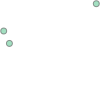

In [ ]:
multi_pts

In [ ]:
# A criação de um objeto do tipo multipolígono também é parecida
#Vamos dividir o mundo em hemisférios ocidentais e orientais e adicionar um buraco no hemisferio ocidental
#Primeiro criamos o exterior do ocidente
oc_ext=[(-180,90),(-180,-90),(0,-90),(0,90)]

#Agora criaremos o buraco. Lmebrando que deve ser uma lista pois podemos ter mais de um
oc_bur=[[(-170,80),(-170,-80),(-10,-80),(-10,80)]]

#Agora criamos o polígono
oc_pol=Polygon(shell=oc_ext, holes=oc_bur)

In [ ]:
#Agora vamos criar o polígono do hemisferio oriental atraves da função box que cria um retÂngulo envolvente
#Para criar um retângulo envolvente precisamos especificar as coordenadas do canto inferior esquerdo
# e do canto inferior direito
min_x,min_y=0,-90
max_x,max_y=180,90

#Agora podemos criar o polígono usando a função box(caixa) que vem do termo bounding box (retângulo
# envolvente em inglÊs)
or_box=box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)

#Agora podemos criar o multipolígono passando os pigono criados anteriormente para 
# a função MultiPolygon no formato de lista
multi_plg=MultiPolygon([oc_pol,or_box])

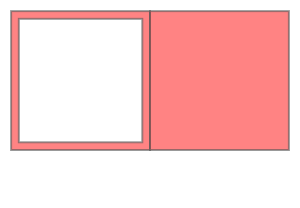

In [ ]:
multi_plg

In [ ]:
#Agora vamos inspecionar os objetos

print(multi_pts)
print(multi_lina)
print(or_box)
print(multi_plg)


MULTIPOINT (5.4 3, 10 -7, 80 25)
MULTILINESTRING ((5.4 3, 10 -7), (10 -7, 80 25))
POLYGON ((180 -90, 180 90, 0 90, 0 -90, 180 -90))
MULTIPOLYGON (((-180 90, -180 -90, 0 -90, 0 90, -180 90), (-170 80, -170 -80, -10 -80, -10 80, -170 80)), ((180 -90, 180 90, 0 90, 0 -90, 180 -90)))


#Atributos e funções das coleções de geometrias

In [ ]:
#Polígono convexo do objeto multipontos. O poligono convexo é determinar o menor polígon que
#engloba um determinado conjunto de geometrias ou feições
conv_pol=multi_pts.convex_hull

#Número de linhas em um objeto MultiLineString
n_lin=len(multi_lina.geoms)

#Area de um objeto MultyPolygon
mlt_plg_area=multi_plg.area

#Também podemos usar indices para acessar diferentes feições dentro da coleção de geometrias
#Calcula a area do polígono ocidental
oc_area=multi_plg.geoms[0].area

#Podemos verificar se a geometria multipoligonos é valida. Ela é considerada valida quando os poligonos
#Não intersectam uns aos outros. Esse não deve ser o caso do nosso polígono do mundo, porque
#os hemisferios tem a mesma origem e intersectam no meridiano de Greenwich (0° de longitude)
val=multi_plg.is_valid

In [ ]:
# Agora vamos inspecionar os resultados:

print(conv_pol)
print(n_lin)
print(mlt_plg_area)
print(val)

POLYGON ((10 -7, 5.4 3, 80 25, 10 -7))
2
39200.0
False
